## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## Dependencies:
To run this notebook, make sure you have the following dependencies installed:

In [1]:
# !pip install pandas==2.2.1
# !pip install scipy==1.13.0
# !pip install matplotlib==3.8.3
# !pip install numpy==1.26.4
# !pip install seaborn==0.13.2

## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [2]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [3]:
# modify the file path with your file path
file_path = '/home/user/PycharmProjects/data_analytics_uni/task_2/LoanStatus.csv'
df = pd.read_csv(file_path)

# display numeric data statistics
df.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [4]:
# choose concrete columns for data statistics
my_cols = ["LoanAmount",
           "Loan_Amount_Term"]

col_desc = df[my_cols].describe()
col_desc

,LoanAmount,Loan_Amount_Term
count,592.000000,600.00000
mean,146.412162,342.00000
std,85.587325,65.12041
min,9.000000,12.00000
25%,100.000000,360.00000
50%,128.000000,360.00000
75%,168.000000,360.00000
max,700.000000,480.00000


In [5]:
# count null values
df.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [6]:
# calculate the amount of total and approved loans from the dataframe
total_loans = len(df) 
approved_loans = (df['Loan_Status'] == 'Y').sum()

# count approved and denied loan probabilities and print results
approval_prob = approved_loans / total_loans 
denial_prob = 1 - approval_prob

print(f"loan approval probability is around {round(approval_prob * 100, 2)} %")
print(f"loan denial probability is around {round(denial_prob * 100, 2)} %")

loan approval probability is around 68.73 %
loan denial probability is around 31.27 %


In [7]:
# use the part of the dataframe with good credit history == 1
credit_history = df['Credit_History'] == 1

# create a new df based on the calculations and calculate columns count
credit_history_df = df[credit_history]
credit_history_count = credit_history.sum()

# find approved loan count
credit_approved_loans = (credit_history_df['Loan_Status'] == 'Y').sum()

# get probability and print result
credit_probability = credit_approved_loans / credit_history_count

print(f"loan approval probability, based on good credit is around {round(credit_probability * 100, 2)} %")

loan approval probability, based on good credit is around 79.58 %


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

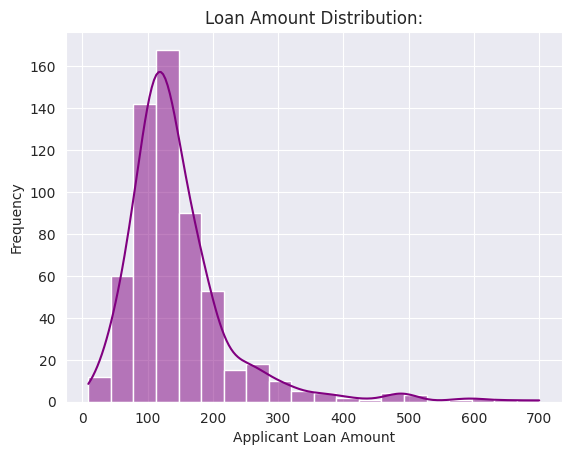

In [9]:
# to ignore future warnings
warnings.filterwarnings("ignore")

# drop null values
loan_amount_cleaned = df['LoanAmount'].dropna()

# plotting a histogram using Loan Amount column
sns.histplot(loan_amount_cleaned, kde=True, bins=20, color='purple')  

# adding labels
plt.title('Loan Amount Distribution:')
plt.xlabel('Applicant Loan Amount')
plt.ylabel('Frequency')

plt.show()  # displaying graph

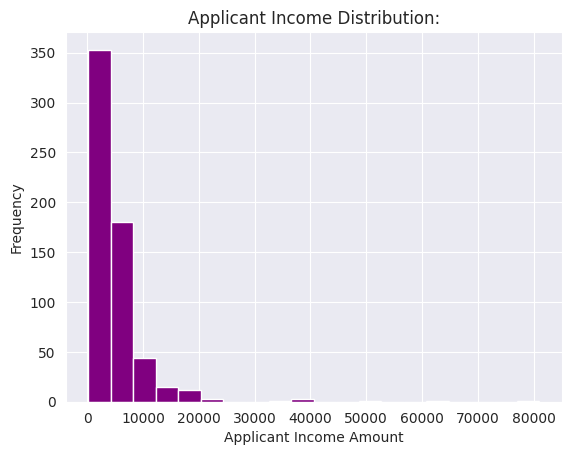

In [10]:
# plotting a histogram using Applicant Income column
plt.hist(df['ApplicantIncome'], bins=20, color='purple')

# adding labels
plt.title('Applicant Income Distribution:')
plt.xlabel('Applicant Income Amount')
plt.ylabel('Frequency')

plt.show()  # displaying graph

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [11]:
from scipy.stats import norm

In [12]:
# set necessary limit
income_limit = 2000

# calculate mean and standard deviation
mean_income = df['ApplicantIncome'].mean()
std_income = df['ApplicantIncome'].std()

# calculate probability
income_prob = norm.cdf(income_limit, mean_income, std_income) * 100

print(f"the percentage of applicants earning less than 2000 euros is {round(income_prob, 2)} %")

the percentage of applicants earning less than 2000 euros is 28.87 %


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

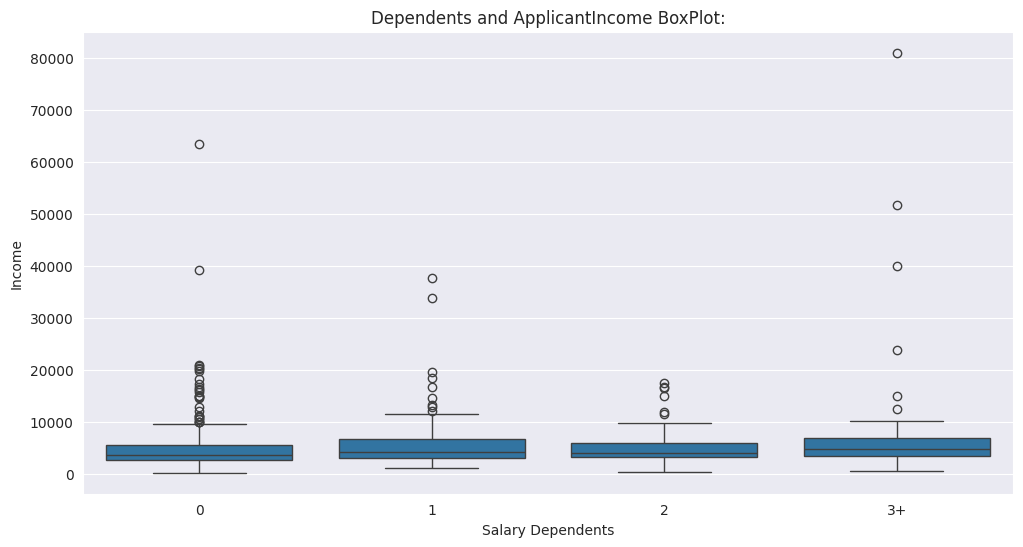

In [13]:
# plotting a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dependents', y='ApplicantIncome', data=df)

# adding labels
plt.title('Dependents and ApplicantIncome BoxPlot:')
plt.xlabel('Salary Dependents')
plt.ylabel('Income')

plt.show()  # displaying graph

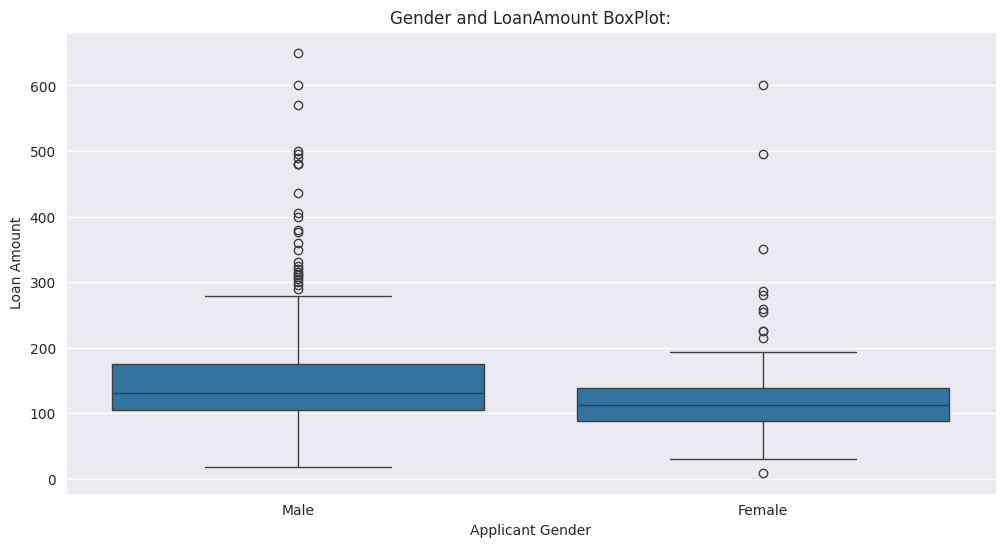

In [14]:
# plotting a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='LoanAmount', data=df)

# adding labels
plt.title('Gender and LoanAmount BoxPlot:')
plt.xlabel('Applicant Gender')
plt.ylabel('Loan Amount')

plt.show()  # displaying graph

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [15]:
from scipy.stats import ttest_1samp,ttest_ind

In [16]:
data_column = df['ApplicantIncome']
check_mean = 5500

# perform one-sample t-test
t_statistic, p_value = ttest_1samp(data_column, check_mean)
alpha = 0.05  # set the significance level (alpha)

if p_value < alpha:
    print(f"mean is significantly different from {check_mean}")
else:
    print(f"mean is not significantly different from {check_mean}")

mean is not significantly different from 5500


In [17]:
female_income = df[df['Gender'] == 'Female']['ApplicantIncome']
male_income = df[df['Gender'] == 'Male']['ApplicantIncome']

# perform two-sample t-test
t_statistic, p_value = ttest_ind(female_income, male_income)
alpha = 0.05  # set the significance level (alpha)

if p_value < alpha:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis
